In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import the train Dataset:
- We Import the Dataset and take a quick look at 3 random rows:

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.sample(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
158422,2013-04-06 17:57:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,SOUTHERN,"ARREST, CITED",800 Block of MARKET ST,-122.406521,37.785063
52509,2014-09-03 12:00:00,MISSING PERSON,FOUND PERSON,Wednesday,MISSION,LOCATED,900 Block of POTRERO AV,-122.406605,37.757158
672227,2005-11-01 16:30:00,NON-CRIMINAL,LOST PROPERTY,Tuesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
215476,2012-06-29 09:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,MISSION,NONE,600 Block of NOE ST,-122.432667,37.759007
170884,2013-02-07 13:52:00,NON-CRIMINAL,AIDED CASE,Thursday,TARAVAL,NONE,0 Block of LOBOS ST,-122.454264,37.714970


- Next we check the columns and their types:

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


Observations:
- The Dataset contains 878049 Observations of 9 Features
- the 'Dates' column is a String ( also it's plural >_> )
- We have Categorical Features: Category, DayOfWeek, PdDistrict, Resolution
- We have Geospatial Information: 'X' (Longitude) and 'Y' (Latitude)
- The 'Address' Column has some kind of structure

## The 'Dates' Column:

### Data Cleaning & Feature Engineering:

#### Check for missing values

In [4]:
train_df.Dates.isnull().any()

False

#### Check for typos by making sure that all values match a Regular Expression

In [5]:
train_df.Dates.str.match('\d\d\d\d-\d\d-\d\d').all()

True

#### First, let's rename the Column (all column names are singular except this one!)

In [6]:
train_df.rename(columns={'Dates': 'DateTime'}, inplace=True)
train_df.columns

Index(['DateTime', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

#### Now Let's parse the dates from String to Datetime

In [7]:
train_df.DateTime = pd.to_datetime(train_df.DateTime)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
DateTime      878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


#### Create separate columns for 'Year', 'Month', 'Hour'

In [8]:
train_df['Year'] = train_df.DateTime.dt.year
train_df['Year'].sample(3)

676966    2005
116277    2013
484660    2008
Name: Year, dtype: int64

In [9]:
train_df['Month'] = train_df.DateTime.dt.month
train_df['Month'].sample(3)

98113      1
137558     7
739153    11
Name: Month, dtype: int64

In [10]:
train_df['Hour'] = train_df.DateTime.dt.hour
train_df['Hour'].sample(3)

778043    15
680009     4
572294    23
Name: Hour, dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 12 columns):
DateTime      878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
Year          878049 non-null int64
Month         878049 non-null int64
Hour          878049 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 80.4+ MB


#### Let's Check the range of Dates:

In [12]:
train_df.DateTime.min(), train_df.DateTime.max()

(Timestamp('2003-01-06 00:01:00'), Timestamp('2015-05-13 23:53:00'))

## Crimes per Year visualization:

In [13]:
gb = train_df.groupby('Year')['Descript'].count()
gb

Year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: Descript, dtype: int64

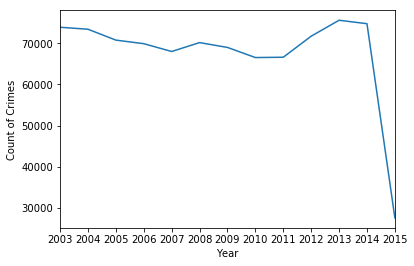

In [14]:
ax = gb.plot(kind='line', xticks=gb.index.values)
ax.set_ylabel('Count of Crimes')

#### We can see that Number of crimes in the last year (2015) is significantly lower, most probably because the data was collected before the year ended ( we'll check that later )

## Crimes per Day Of Week visualization:

#### Let's Check how many crimes are commited in each day

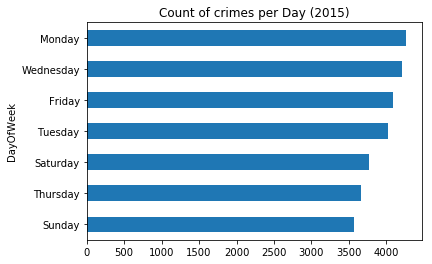

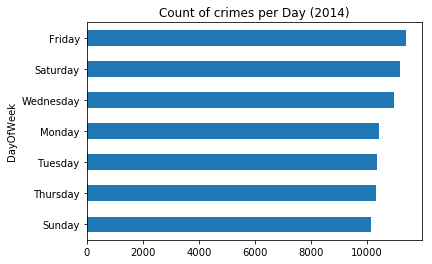

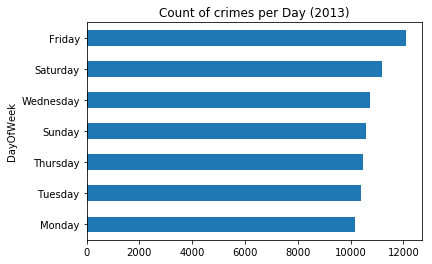

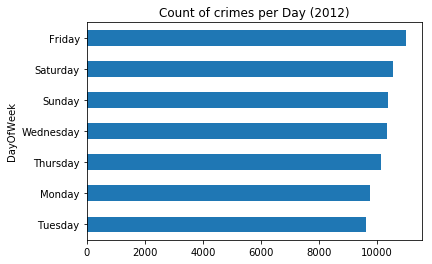

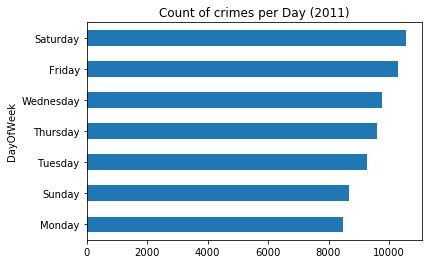

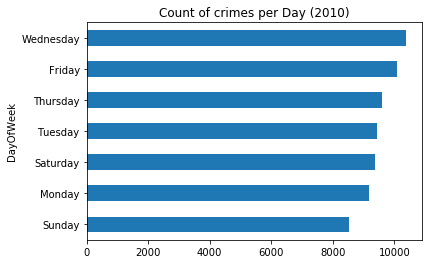

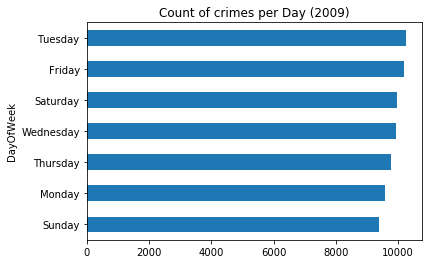

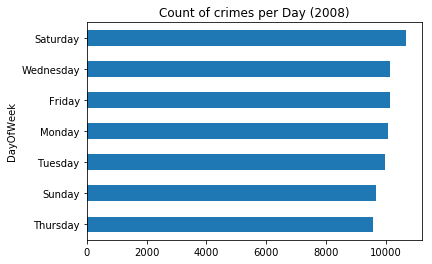

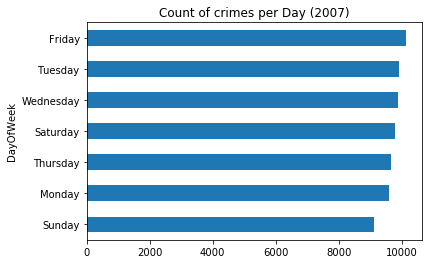

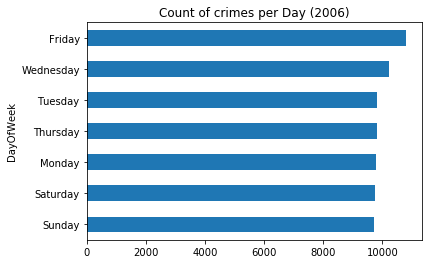

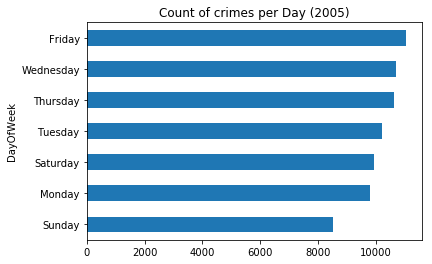

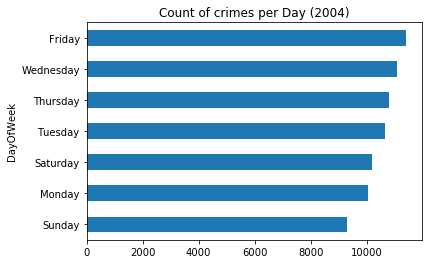

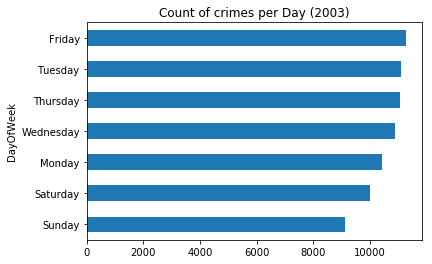

In [15]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('DayOfWeek')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Day ({y})', fig=(16,5))
    plt.show()

#### We notice that Friday almost always takes the top place.

## Crimes per Month visualization:

#### Let's Check if there are any patterns regarding the months :

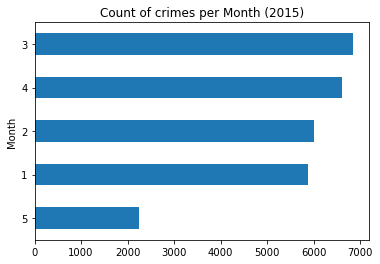

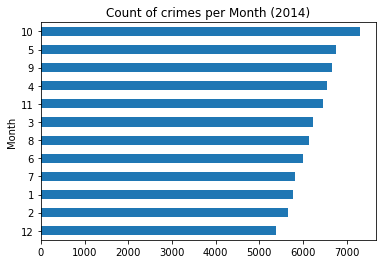

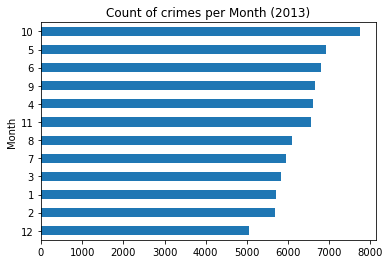

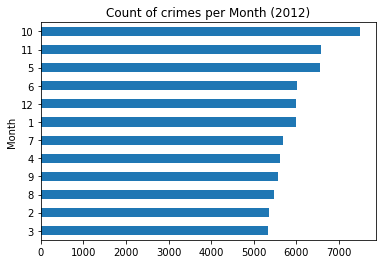

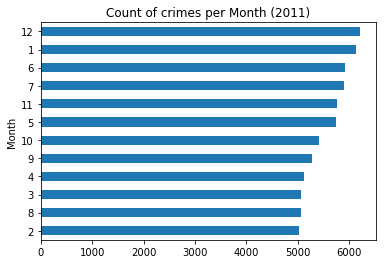

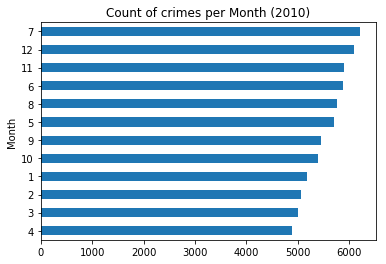

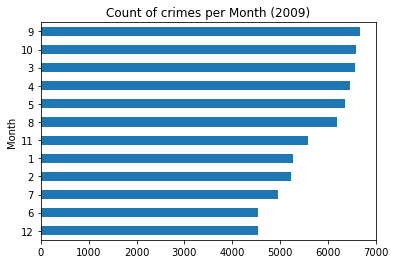

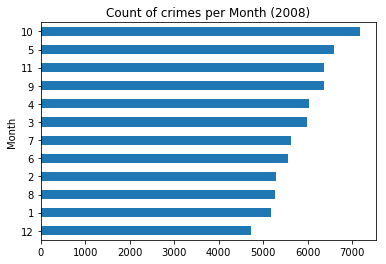

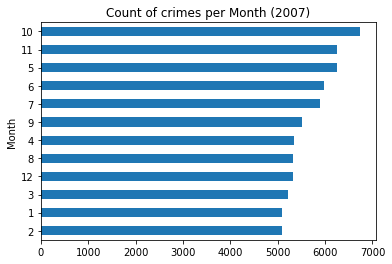

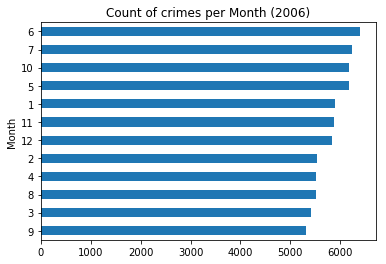

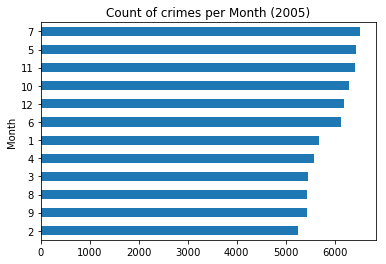

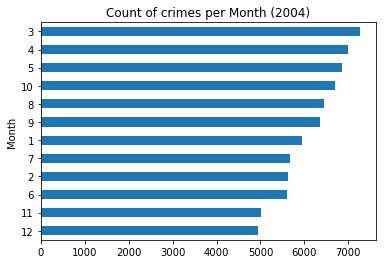

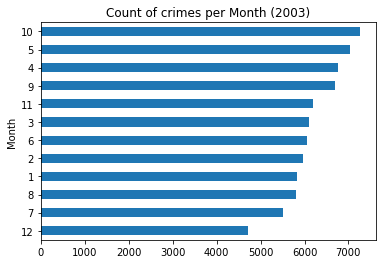

In [16]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('Month')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Month ({y})', fig=(16,5))
    plt.show()

#### We confirm that the data for year 2015 is incomplete ( only 5 months of data is present )

## Crimes per Hour of the Day Visualization:

#### One thing we can do is to group hours into easy to read time slots  ( of 4 hours ):
    - 16 ~ 20h
    - 20 ~ 00h
    - 01 ~ 04h
    - 04 ~ 08h
    - 08 ~ 12h
    - 12 ~ 16h
( We can later check which crimes are commited when :-) )

In [17]:
# Create a new Column TimeSlot

def get_timeslot(hour):
    if hour > 16 and hour <= 20:
        return '16h - 20h'
    elif hour > 20 or hour == 0:
        return '20h - 00h'
    elif hour > 0 and hour <= 4:
        return '00h - 04h'
    elif hour > 4 and hour <= 8:
        return '04h - 08h'
    elif hour > 8 and hour <= 12:
        return '08h - 12h'
    elif hour > 12 and hour <= 16:
        return '12h - 16h'
    else:
        return 'wtf'

train_df['TimeSlot']  = train_df.Hour.apply(get_timeslot)

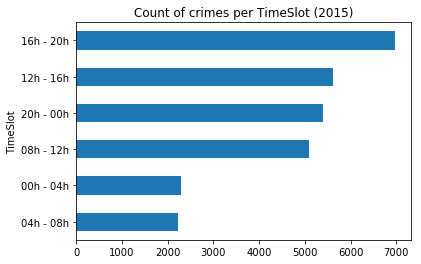

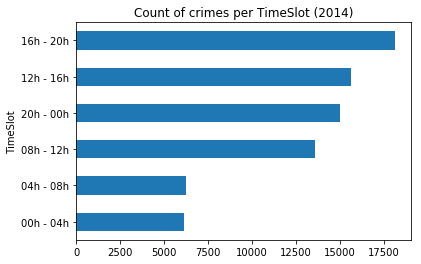

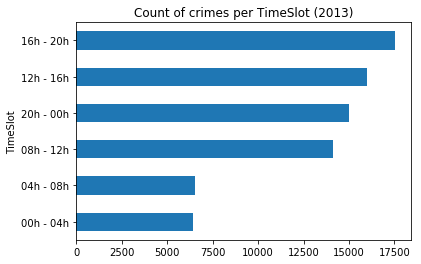

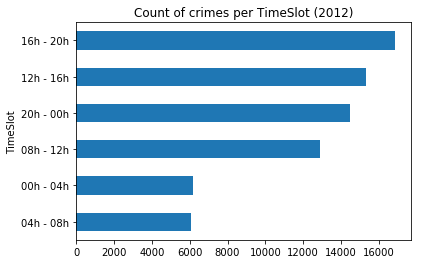

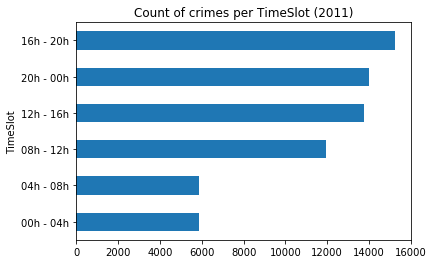

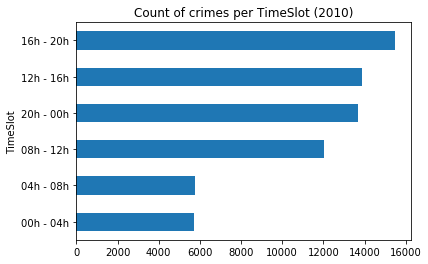

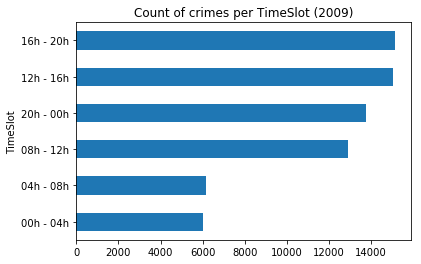

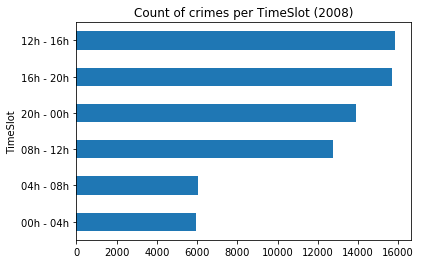

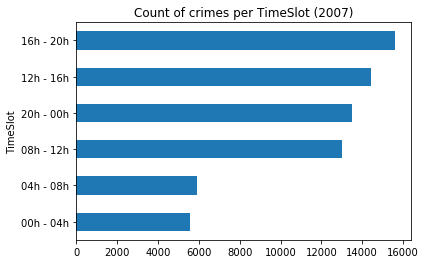

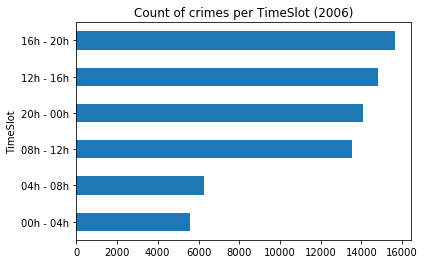

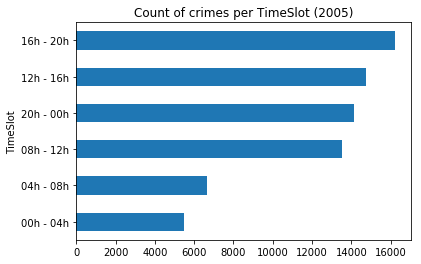

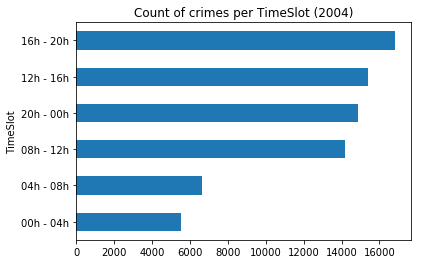

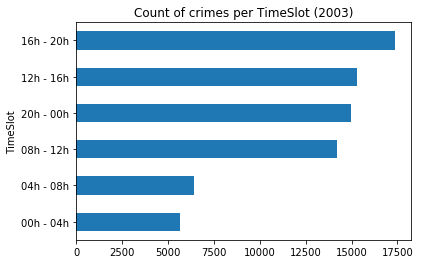

In [18]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('TimeSlot')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per TimeSlot ({y})', fig=(18,7))
    plt.show()

#### We can see that in each year, the most of the crimes are commited between 16h and 20h, whereas fewer crimes are commited between 00h and 08h

#### Another nice feature to have, is whether it's night or day. We'll create a new binary column for it, where 1 is Day and 0 is Night

In [19]:
# Create IsDay Column
train_df['IsDay']  = train_df.Hour.apply(lambda x: 1 if (x > 7 and x < 20) else 0)

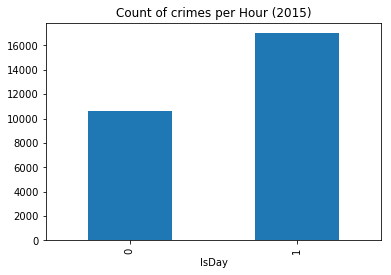

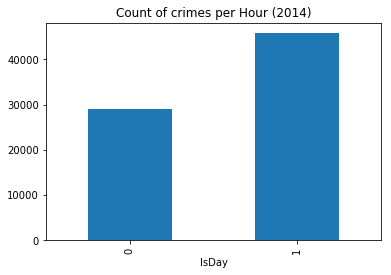

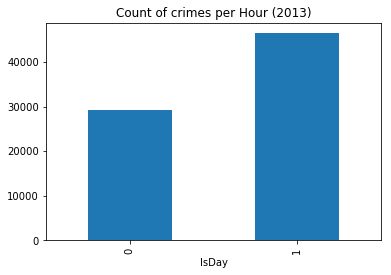

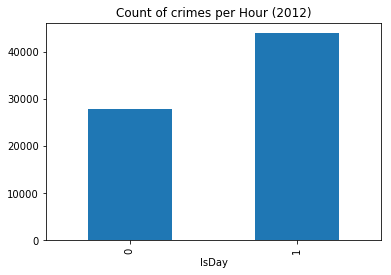

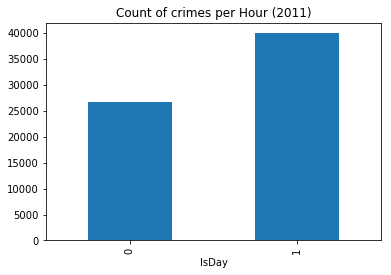

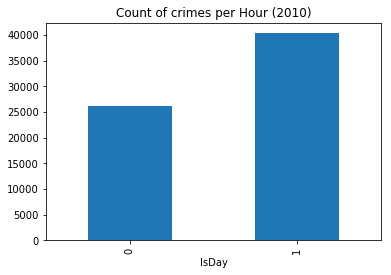

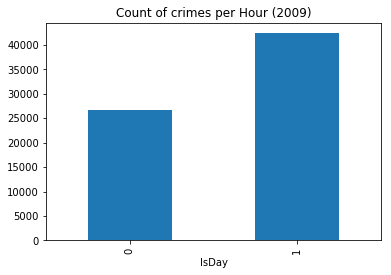

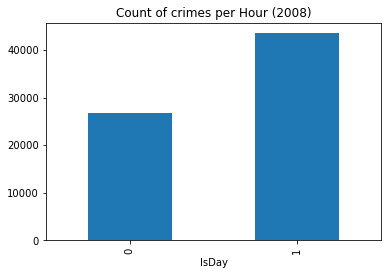

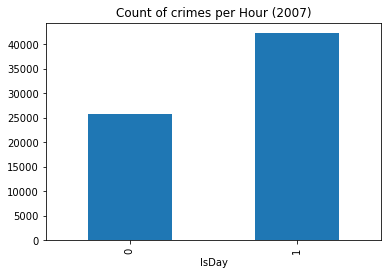

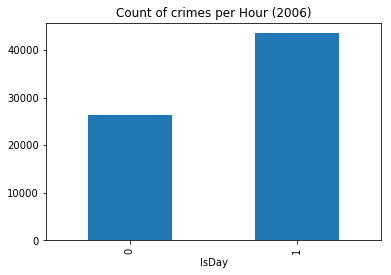

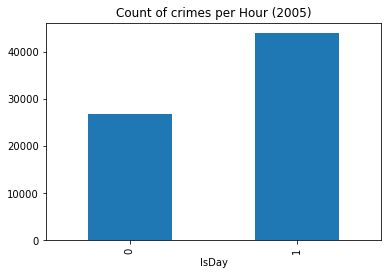

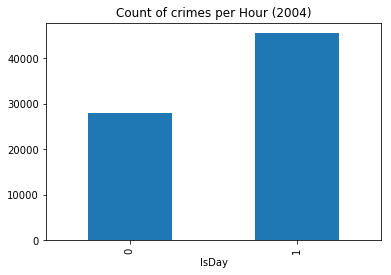

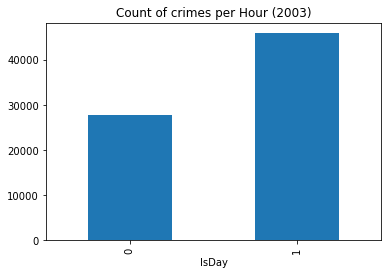

In [20]:
for y in train_df.Year.unique():
    ax = train_df[train_df['Year'] == y].groupby('IsDay')['Descript'].count().sort_values().plot(kind='bar', title=f'Count of crimes per Hour ({y})', fig=(18,7))
    plt.show()

#### We can see that most of the crimes occur by day, but that doesn't mean much for now. We shall see next, after we include the category of the crime, which crimes most occur by day/night.

## Output to CSV

In [21]:
train_df.to_csv('data/inter/train_clean_1.csv',index=False)
print('Done Outputing')

Done Outputing
